In [3]:
#fichiers contenant les fonctions utiles
import pandas as pd
from premiere_analyse import *
from testZ import *
import matplotlib.pyplot as plt
import matplotlib.axes as ma
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.tsa.stattools as sto
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import scipy.stats as st
import seaborn as sns
sns.set_style("white")

In [4]:
#données de la campagne
folder = 'C:/Users/Admin/Documents/Centrale Paris/3A/OMA/Projet 1000mercis/Donnees/'
annonceur = 'annonceur1/annonceur1'
campagne = 'annonceur1_campaign2_visite_2pages'
data = pd.read_hdf(folder + annonceur + '.hdf', key=campagne)
data = data.reset_index()

### 1. Tracer la différence relative entre les taux de conversion des groupes A et B en fonction du temps pour la campagne.

#### a. Différence relative des taux de conversion par jour, semaine et mois

In [3]:
freq_list = ["1D", "1W", "1M"]

conv_rate = {}
pct_change = {}
conv_count = {}

for freq in freq_list:
    conv_count[freq] = conversion_count_resample(data, freq)
    conv_rate[freq] = conversion_rate_resample(data, freq)
    pct_change[freq] = (conv_rate[freq]["A"] - conv_rate[freq]["B"]) / conv_rate[freq]["B"]


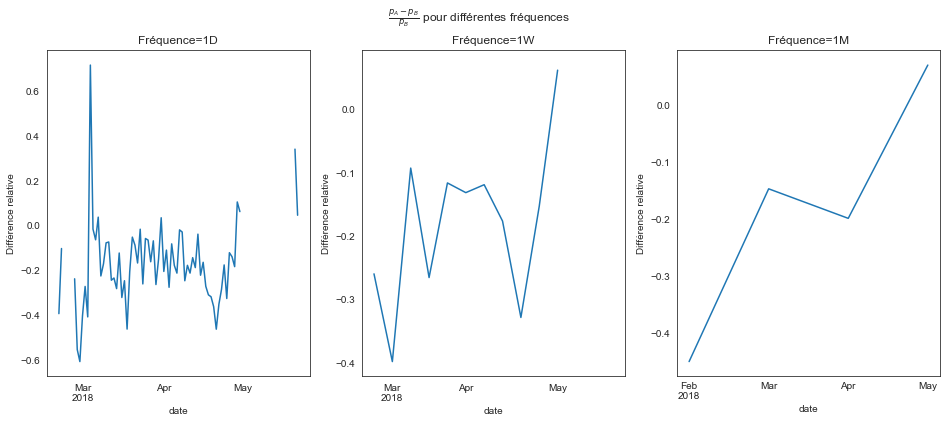

In [4]:
# trace des variations relatives du taux de conversion entre A et B pour frequences differentes
plt.figure(figsize=(16, 6))
for i, freq in enumerate(freq_list):
    plt.subplot(1, len(freq_list), i+1)
    pct_change[freq].plot(ax=plt.gca())
    plt.title(f"Fréquence={freq}")
    plt.ylabel('Différence relative')
plt.suptitle('$\\frac{p_A - p_B}{p_B}$ pour différentes fréquences')
plt.show()

Ci-dessus sont tracés les séries de la différence relative du taux de conversion entre A et B. Les trois graphiques correspondent respectivement à une agrégation du taux de conversion par jour, par semaine et par mois.
Ces tracés permettent d’avoir une première visualisation rapide des données et d’observer les
particularités, les différences facilement notables. Il s’agit en fait d’avoir une première idée de ce que l’on manipule.
L'utilisation de différents niveaux d'agrégation permet de comparer les taux à ces différentes échelles et de déterminer laquelle est la plus intéressante pour notre étude.

Ici, on remarque des grandes différences entre les différents niveaux d'agrégation, liées majoritairement au nombre de points disponibles. Le taux moyen par jour semble présenter une composante périodique alors que les taux par semaine et par mois manquent de points pour l'analyse. Le taux moyen par semaine présente néanmoins un début de composante périodique. 

#### b. Pattern journalier/hebdomadaire/mensuel sur la différence relative des taux journaliers?

In [3]:
dataA, dataB = preparer(data)

Conversion des index en dates
Moyennes des taux par jour et séparation en deux groupes A et B


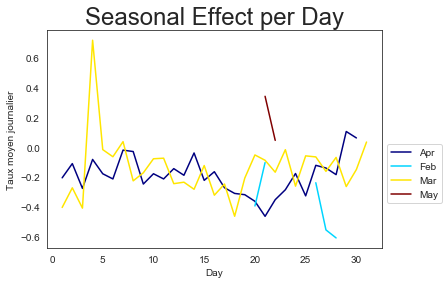

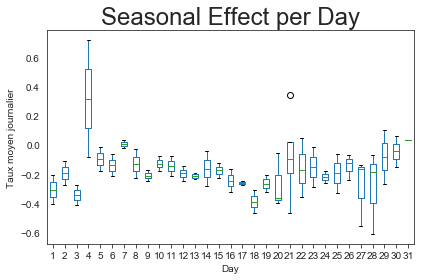

In [4]:
diff = (dataA['is_conv'] - dataB['is_conv']) /dataB['is_conv']
diff.index = pd.to_datetime(diff.index)
diff = pd.Series.to_frame(diff)
effet_journalier(diff)

Le premier graphe correspond au tracé de la série pour les différents mois afin de pouvoir les observer chacun séparément et d'identifier un motif commun s'il en est. Le second graphe présente les boxplots des taux de conversion par jour pour chaque jour du mois (par exemple, le premier boxplot est le boxplot des valeurs du 1er février, 1er mars, 1er avril et 1er mai).

Il est à noter que les mois n'ont pas le même nombre de jours et qu'il y a des données manquantes ce qui perturbe l'analyse.

On peut toutefois deviner un motif de fin et début de mois où le taux semble augmenter légèrement. Cela peut s'expliquer par le fait que les budgets des campagnes se décident en fin/début de mois et donc c'est à ce moment qu'une nouvelle campagne peut se lancer. Il faudrait davantage de données pour confirmer ce pattern.

### 2. Z_test et P_value cumulées

#### a. Pas d'un jour

In [5]:
Z_cum, P_rej, p_cum = testZ_cum(data)

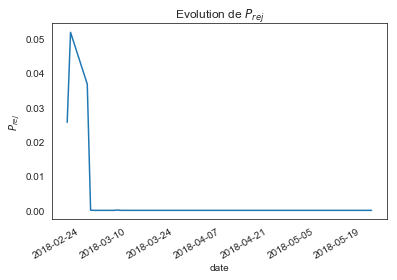

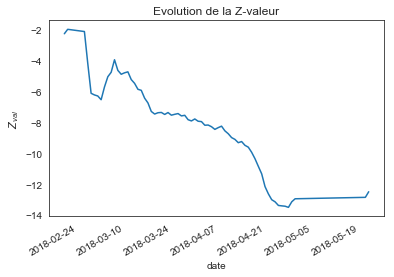

In [6]:
P_rej.plot(title='Evolution de $P_{rej}$', ax=plt.gca())
plt.ylabel('$P_{rej}$')
plt.show()


Z_cum.plot(title='Evolution de la Z-valeur', ax=plt.gca())
plt.ylabel('$Z_{val}$')
plt.show()

Nous tracons les graphiques des P-valeur et Z-valeur en fonction du temps, ceci nous permet d'avaluer la significativité du test au cours du temps puisque celle-ci dépend précisément de ces deux valeurs.

Nous observons une stabilité rapide de P (27 fev 2018), beaucoup plus lente pour Z (21 avril 2018). Cette différence est intéressante et est due à l'effet de la gaussienne dans la p-valeur, non présent dans la Z-valeur.

### 3. Évolution de la significativité du test

#### a. Significativité à 90%

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier :
100.0


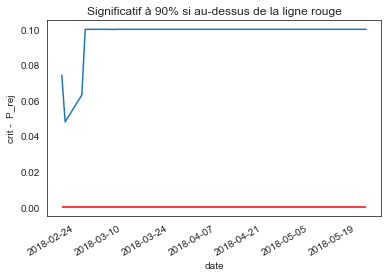

In [7]:
crit = 0.1 #90%

s =  - (P_rej - crit)  # il faut P_rej < crit, soit s > 0
   
s.plot(title="Significatif à 90% si au-dessus de la ligne rouge", ax=plt.gca())
plt.ylabel("crit -  P_rej")
plt.hlines(0,xmin = P_rej.index[0],xmax = P_rej.index[len(P_rej)-1], color = 'r')

print("Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier :")
print(round(sum((P_rej - crit < 0))/len(P_rej)*100,1))


Nous ajoutons au graphique précédent la ligne de significativité du test à 90%: le test est significatif si la p-valeur est plus petite qu'une certaine valeur critique, choisie ici à 0.1. Nous tracons donc la différence entre la valeur critique et la p-valeur du test qui doit être positive pour assurer la significativité du test.

Ici, la p-valeur est toujours inférieure à la valeur critique, le test est donc significatif, une version est meilleure que l'autre. Le signe de la Z-stattistique nous indique laquelle: en effet Z étant du signe de pA - pB, Z positif signifie une dominance de la version A, Z négatif une dominance de la version B en termes de conversions. La version B est en l'occurence meilleure que la A ici.


##### Par semaine

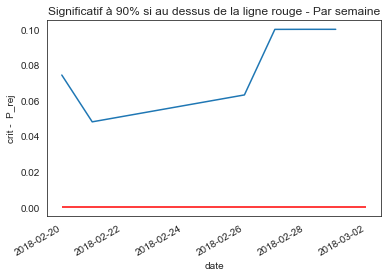

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


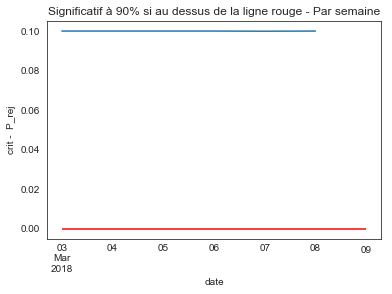

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


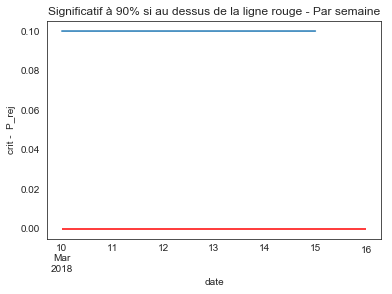

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


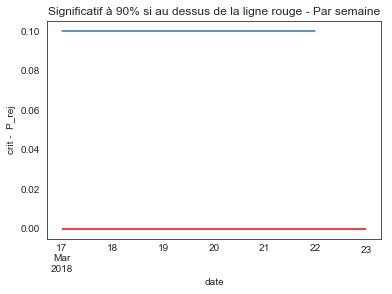

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


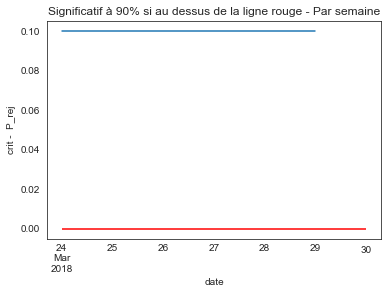

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


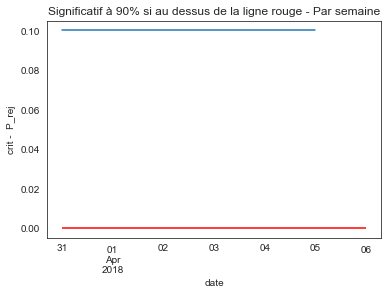

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


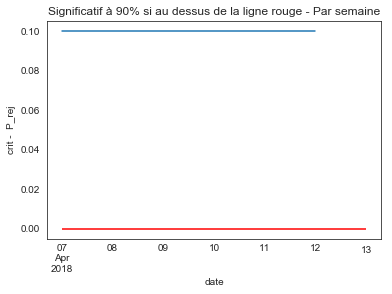

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


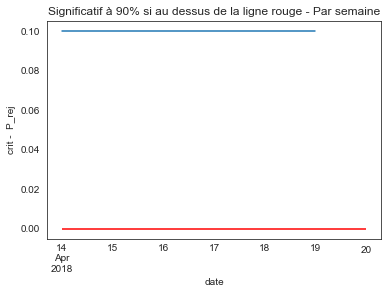

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


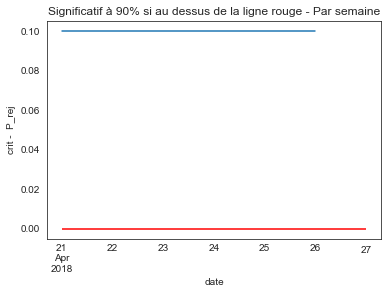

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


In [8]:
for i in range(len(s)//7):
    s[7*i:7*(i+1)-1].plot(title="Significatif à 90% si au dessus de la ligne rouge - Par semaine", ax=plt.gca())
    plt.ylabel("crit -  P_rej")
    plt.hlines(0,xmin = P_rej.index[7*i],xmax = P_rej.index[7*(i+1)-1], color = 'r')
    plt.show()
    # pourcentage de p_val significative ie < crit
    print("Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:")
    print(round(sum((s[7*i:7*(i+1)-1] > 0))/len(s[7*i:7*(i+1)-1])*100,1))
    


Nous tracons la significativité par semaine afin d'identifier des variations plus locales, dans notre cas, le test reste toujours significatif.

##### Par mois

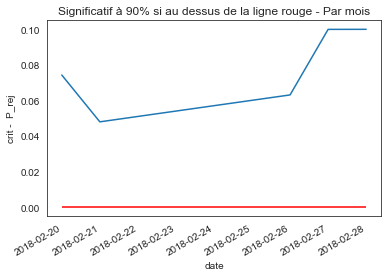

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:
100.0


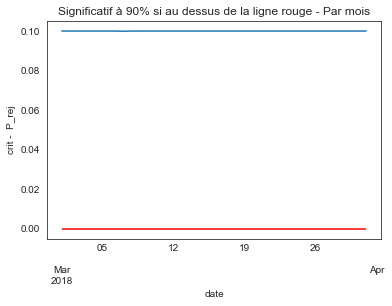

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:
100.0


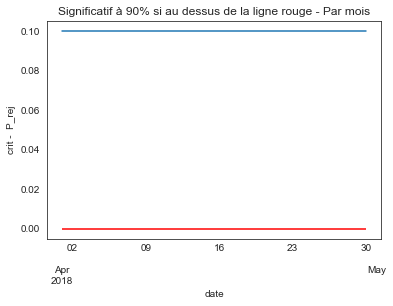

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:
100.0


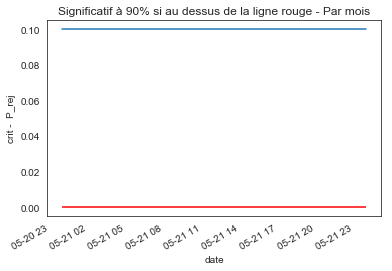

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:
100.0


In [13]:
for month in ['2018-02', '2018-03','2018-04','2018-05']:
    s.loc[month].plot(title="Significatif à 90% si au dessus de la ligne rouge - Par mois", ax=plt.gca())
    plt.ylabel("crit -  P_rej")
    plt.hlines(0,xmin = P_rej.loc[month].index[0],xmax = P_rej.loc[month].index[len(P_rej.loc[month])-1], color = 'r')
    plt.show()
    
    print("Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:")
    print(round(sum((s.loc[month] > 0))/len(s.loc[month])*100,1))

Nous tracons de même la significativité par mois. Le test reste significatif bien sûr.

#### b. Significativité à 80%

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier :
100.0


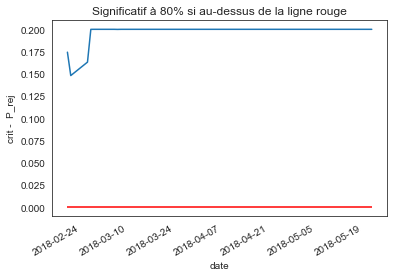

In [14]:
crit = 0.2 #80%

s = - (P_rej - crit)

s.plot(title="Significatif à 80% si au-dessus de la ligne rouge", ax=plt.gca())
plt.ylabel("crit -  P_rej")
plt.hlines(0,xmin = P_rej.index[0],xmax = P_rej.index[len(P_rej)-1], color = 'r')

print("Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier :")
print(round(sum((P_rej - crit <= 0))/len(P_rej)*100,1))

Nous recommencons l'analyse avec un seuil de significativité moins élevé : 80%. Le test est bien significatif à 80%, la version B est la meilleure.

##### Par semaine

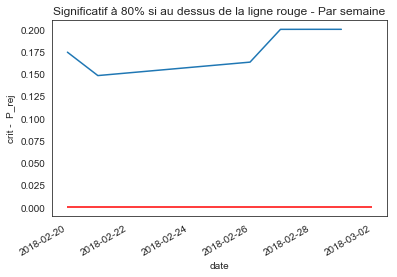

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


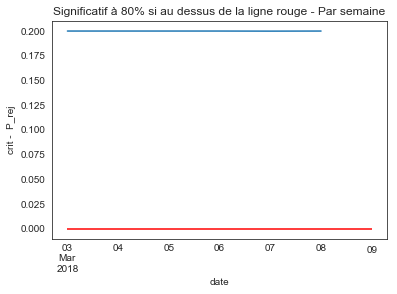

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


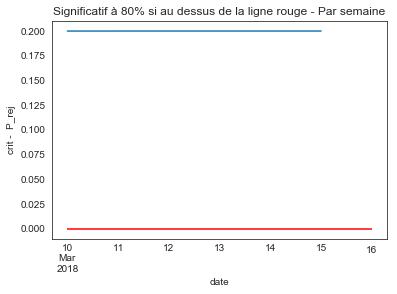

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


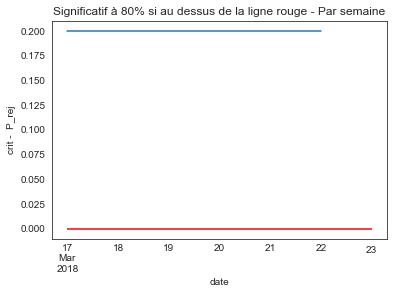

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


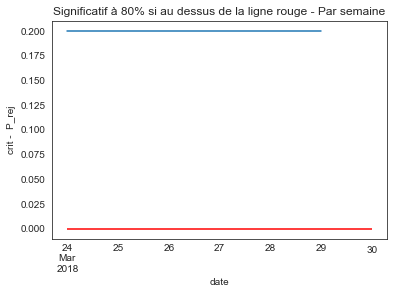

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


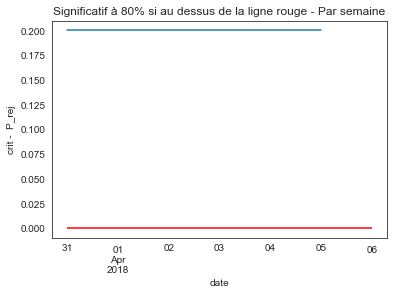

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


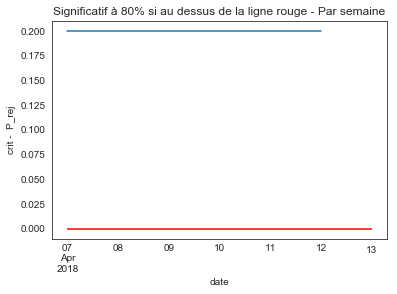

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


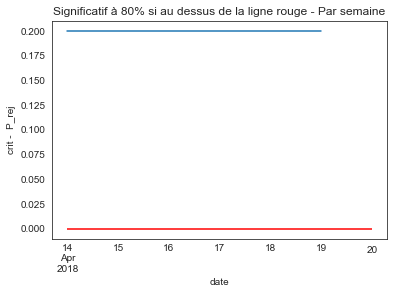

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


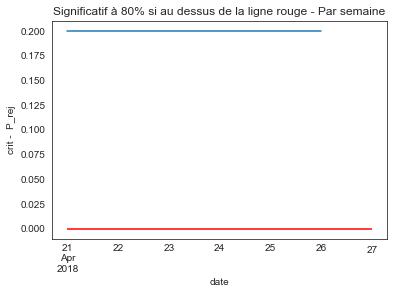

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


In [15]:
for i in range(len(s)//7):
    s[7*i:7*(i+1)-1].plot(title="Significatif à 80% si au dessus de la ligne rouge - Par semaine", ax=plt.gca())
    plt.ylabel("crit -  P_rej")
    plt.hlines(0,xmin = P_rej.index[7*i],xmax = P_rej.index[7*(i+1)-1], color = 'r')
    plt.show()
    
    print("Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:")
    print(round(sum((s[7*i:7*(i+1)-1] > 0))/len(s[7*i:7*(i+1)-1])*100,1))

##### Par mois


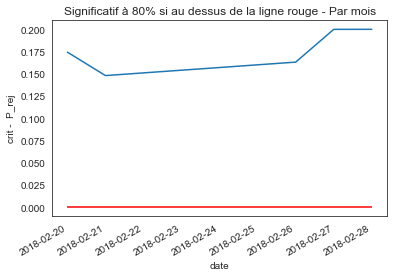

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:
100.0


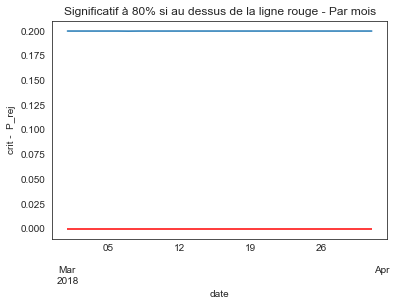

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:
100.0


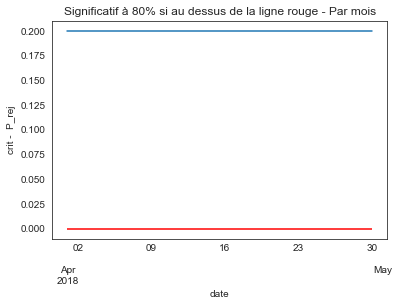

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:
100.0


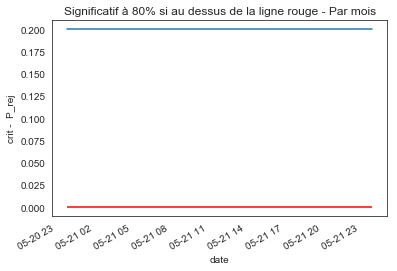

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:
100.0


In [16]:
for month in ['2018-02', '2018-03','2018-04','2018-05']:
    s.loc[month].plot(title="Significatif à 80% si au dessus de la ligne rouge - Par mois", ax=plt.gca())
    plt.ylabel("crit -  P_rej")
    plt.hlines(0,xmin = P_rej.loc[month].index[0],xmax = P_rej.loc[month].index[len(P_rej.loc[month])-1], color = 'r')
    plt.show()
    
    print("Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:")
    print(round(sum((s.loc[month] > 0))/len(s.loc[month])*100,1))

Nous n'observons sans surprise aucune variation dans un mois ou une semaine, le test est toujours significatif.

#### c. Tests Z cumulés

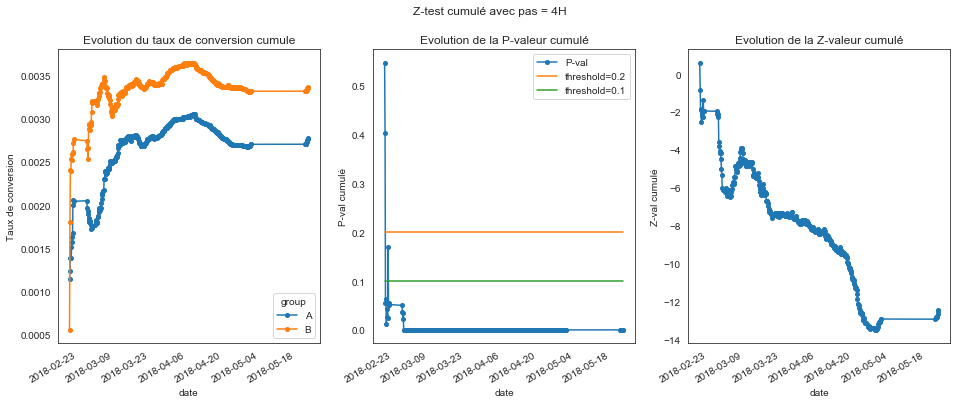

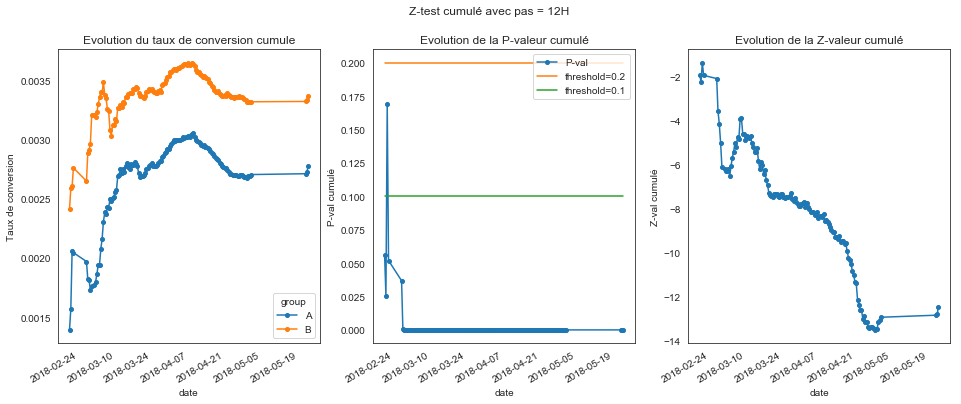

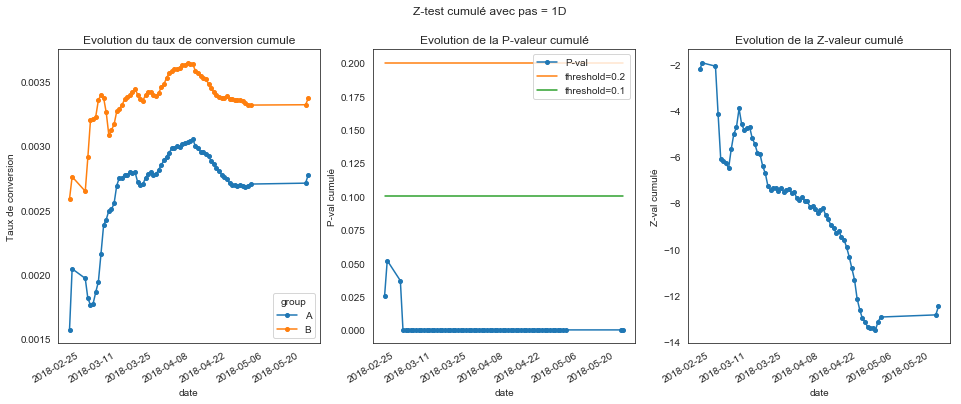

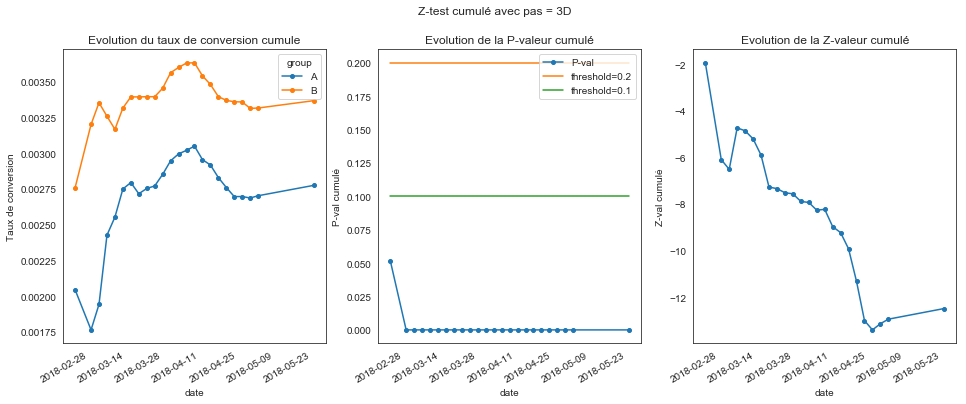

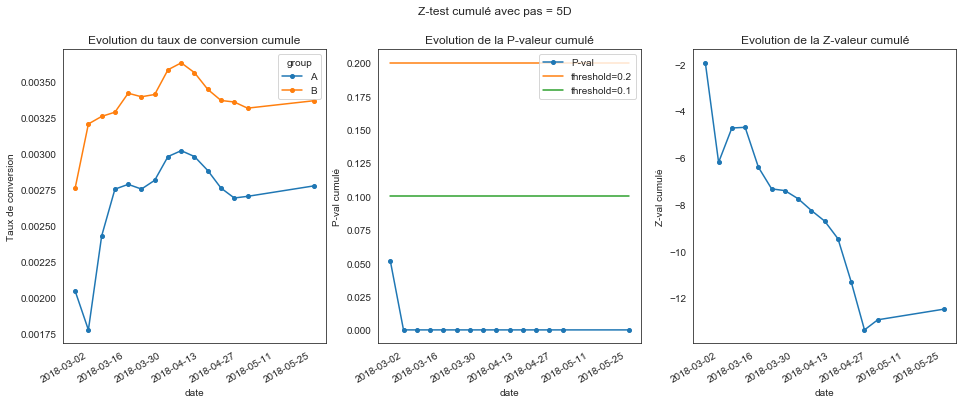

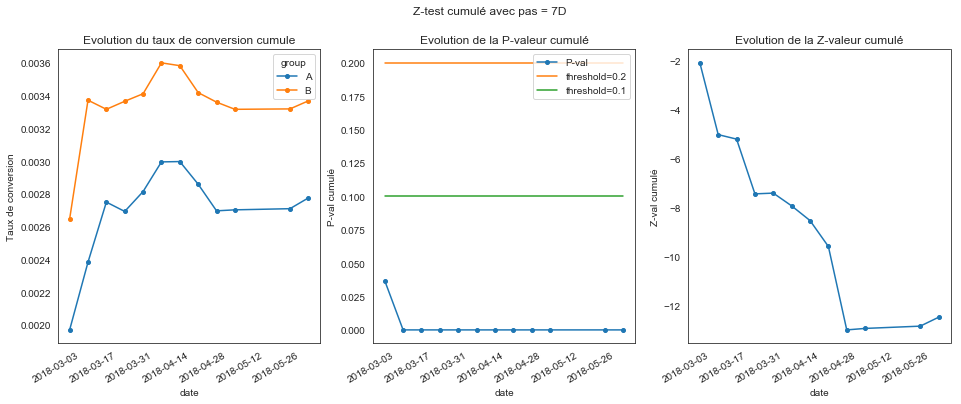

In [3]:
for freq in ["4H", "12H", "1D","3D", "5D", "7D"]:  # 1W does not work but 7D is ok
    Z_cum, P_rej, p_cum = testZ_cum_frequency(data, freq=freq)
    plot_testZ_cum_frequency(Z_cum, P_rej, p_cum, freq)

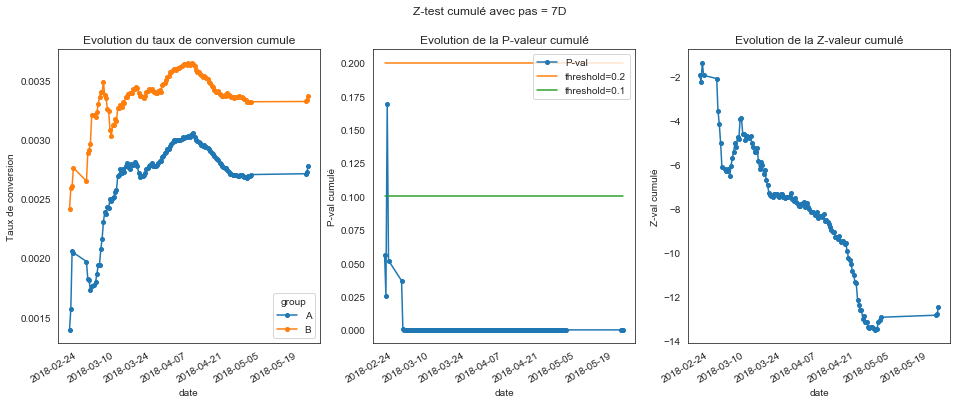

In [4]:
Z_cum, P_rej, p_cum = testZ_cum_frequency(data, freq="12H")
plot_testZ_cum_frequency(Z_cum, P_rej, p_cum, freq)

Ici, nous nous intéressons au Z-test du taux de conversion cumulé sur différents pas de temps (de plusieurs heures à plusieurs jours) afin de déceler des éventuelles différences de comportements en fonction du niveau d'agrégation. Le test est signifatif si la courbe de la P-valeur est en dessous des valeurs seuil 0.2 et 0.1. 

Le test est reste évidemment significatif pour les différentes fréquences testées. On remarque peu de différences entre les pas de temps cumulés, la forme des courbes reste la même, seul le nombre de points varie puisqu'il y en a moins lorsque l'on agrège sur un plus grand intervalle de temps.

### 4. Stationnarité de la série de la différence relative des taux de conversion journaliers

In [5]:
adf_test(diff['is_conv'])

,Results of Augmented Dickey-Fuller test:
test statistic,-3.510210
p-value,0.007729
# of lags,1.000000
# of observations,66.000000
Critical Value (1%),-3.533560
Critical Value (5%),-2.906444
Critical Value (10%),-2.590724


La stationnarité de la série est évaluée grâce au test de Dickey-Fuller, ce qui engendrera ou non des transformations diférentielle ou logarithmique sur la série. L’intérêt de cette étude est de déterminer si la série est stationnaire et la tranformer si ce n’est pas le cas. En effet, la moyenne d’une série stationnaire ne dépend pas du temps, ni même sa fonction de convariance, il est donc plus aisé de manipuler des séries stationnaires.

Ici, la statistique de test est très légèrement supérieure à la valeur critique à 1%, la série est presque stationnaire. Elle l'est de manière certaine après différenciation au 1er ordre:

In [6]:
adf_test(np.diff(diff['is_conv']))

,Results of Augmented Dickey-Fuller test:
test statistic,-1.348981e+01
p-value,3.122245e-25
# of lags,0.000000e+00
# of observations,6.600000e+01
Critical Value (1%),-3.533560e+00
Critical Value (5%),-2.906444e+00
Critical Value (10%),-2.590724e+00


La série différenciée une fois est stationnaire et le test donne B comme meilleure version de la bannière.

### 5. Modèles ARMA

Nous tentons ici de trouver un modèle ARMA pour les séries temporelles Z et P avec un pas de 1 jour. Identifier le meilleur modèle correspondant aux données nous permettra d'appliquer certaines propriétés connues dans le but de pouvoir prédire l'instant d'arrêt du test entre les deux versions (i.e. prédire aue l'évolution sera stable à partir de cet instant d'arrêt).

In [38]:
Z_cum, P_rej, p_cum = testZ_cum_frequency(data, freq='1D')

#### a. Z statistique

## Analyse classique d'une ST

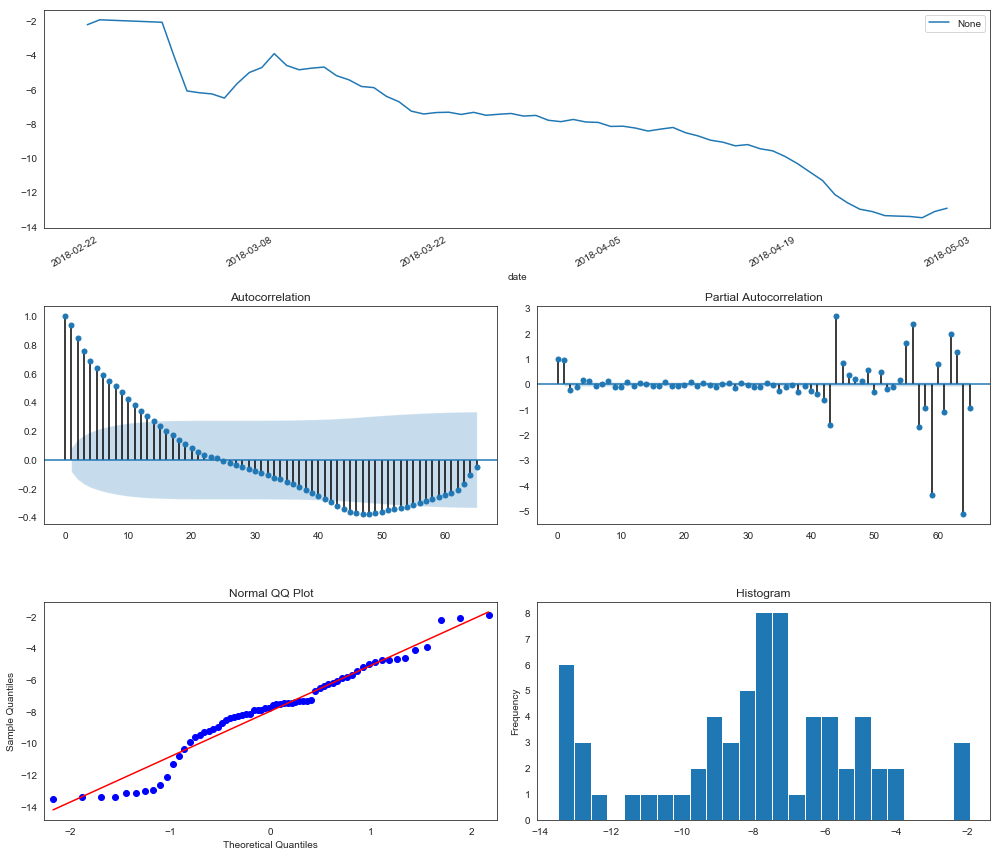

## Décomposition de la série de temps selon modèle multiplicatif



Multiplicative seasonality is not appropriate for zero and negative values


## Test de Dickey-Fuller

,Results of Augmented Dickey-Fuller test:
test statistic,-0.192654
p-value,0.939392
# of lags,11.000000
# of observations,54.000000
Critical Value (1%),-3.557709
Critical Value (5%),-2.916770
Critical Value (10%),-2.596222


In [4]:
analyserZP(Z_cum)

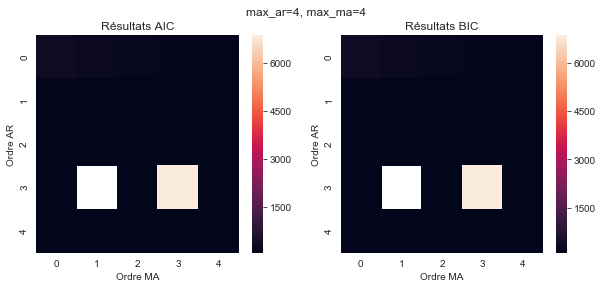

AIC meilleur modèle : AR=4, MA=4, AIC=78.2279086263417 
BIC meilleur modèle : AR=2, MA=0, BIC=90.08596348296177 


In [17]:

##################################### PARAMETRES #####################################
max_ar = 4
max_ma = 4
######################################################################################

order_select = sto.arma_order_select_ic(
    Z_cum.values,
    ic = ['aic', 'bic'],
    max_ar=max_ar, 
    max_ma=max_ma
)

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.heatmap(order_select["aic"])
plt.xlabel("Ordre MA")
plt.ylabel("Ordre AR")
plt.title("Résultats AIC")

plt.subplot(1, 2, 2)
sns.heatmap(order_select["bic"])
plt.xlabel("Ordre MA")
plt.ylabel("Ordre AR")
plt.title("Résultats BIC")

plt.suptitle(f"max_ar={max_ar}, max_ma={max_ma}")
plt.show();

aic_min_order = order_select["aic_min_order"]
bic_min_order = order_select["bic_min_order"]
print(
    "AIC meilleur modèle : AR={}, MA={}, AIC={} ".format(
        aic_min_order[0], aic_min_order[1], 
        order_select['aic'].loc[aic_min_order]
    )
)
print(
    "BIC meilleur modèle : AR={}, MA={}, BIC={} ".format(
        bic_min_order[0], bic_min_order[1], 
        order_select['bic'].loc[bic_min_order]
    )
)

# Meilleur modèle selon AIC

# Meilleur modèle selon BIC

## Fit du modèle



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   66
Model:                     ARMA(2, 0)   Log Likelihood                 -36.664
Method:                       css-mle   S.D. of innovations              0.407
Date:                Mon, 28 Jan 2019   AIC                             81.327
Time:                        19:28:11   BIC                             90.086
Sample:                             0   HQIC                            84.788
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.7836      2.895     -2.689      0.009     -13.458      -2.109
ar.L1.y        1.5072      0.106     14.175      0.000       1.299       1.716
ar.L2.y       -0.5188      0.109     -4.740      0

## Erreurs

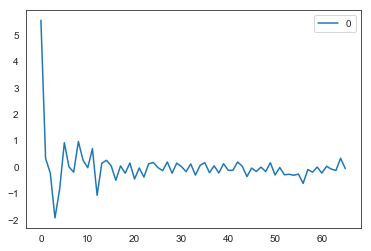

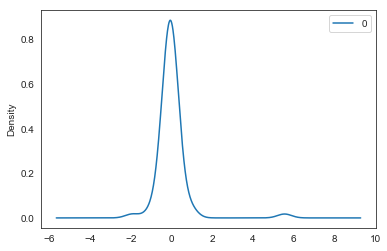

               0
count  66.000000
mean    0.006063
std     0.798347
min    -1.921122
25%    -0.226288
50%    -0.034707
75%     0.128372
max     5.552655


In [18]:
display(Markdown("# Meilleur modèle selon AIC"))
#testARMA(Z_cum.values, p=aic_min_order[0], d=0, q=aic_min_order[1]) not stationary

display(Markdown("# Meilleur modèle selon BIC"))
testARMA(Z_cum.values, p=bic_min_order[0], d=0, q=bic_min_order[1])

MA(2) retenu. Les p-valeurs des coefficients sont inférieures au seuil 0,2 et quasiment à celui de 0,1. Les erreurs du modèle suivent une gaussienne centrée en 0.

Attention,  4  journées avec NaN
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   70
Model:                     ARMA(2, 0)   Log Likelihood                 -36.590
Method:                       css-mle   S.D. of innovations              0.394
Date:                Mon, 28 Jan 2019   AIC                             81.180
Time:                        19:28:12   BIC                             90.174
Sample:                    02-21-2018   HQIC                            84.752
                         - 05-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.6293      3.063     -2.491      0.015     -13.633      -1.626
ar.L1.y        1.5087      0.103     14.682      0.000       1.307       1.710
ar.L2.y       -0.51

## Erreurs

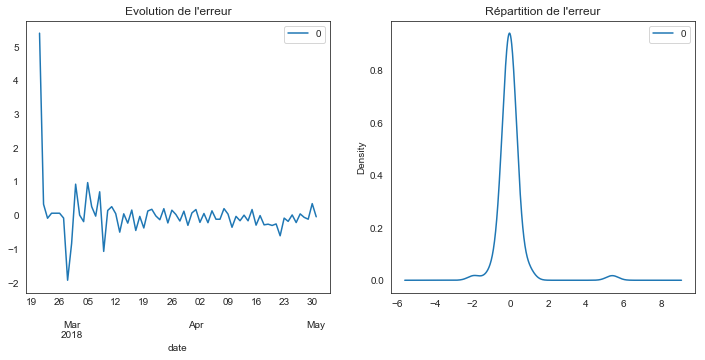

In [19]:
##################################### PARAMETRES #####################################
p = bic_min_order[0]  # AR(p)
d = 0  # d=0 pour ARMA
q = bic_min_order[1]  # MA(q)
p, q = 2, 0
######################################################################################

# asfreq permettra de faire des predictions et de les afficher facilement...
# ffill au cas ou il manque des jours... 
# mais faire très attention aux datasets où il manque une grosse plage de journées!
# genre a1c1 vers la fin... donc je mets une limite au nb max de jours manquants
print("Attention, ", Z_cum.asfreq("D").isna().sum(), " journées avec NaN")

model_z = ARIMA(Z_cum.asfreq("D").fillna(method="ffill"), order=(p, d, q), freq="D").fit()
# model_fit = model.fit(disp=0)
print(model_z.summary())
# print(model_fit.summary())
display(Markdown("## Erreurs"))
print('\n')
residuals = DataFrame(model_z.resid)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
residuals.plot(ax=plt.gca())
plt.title("Evolution de l'erreur")

plt.subplot(1, 2, 2)
residuals.plot(kind='kde', ax=plt.gca())
plt.title("Répartition de l'erreur")

plt.show()

#### b. P valeur

## Analyse classique d'une ST

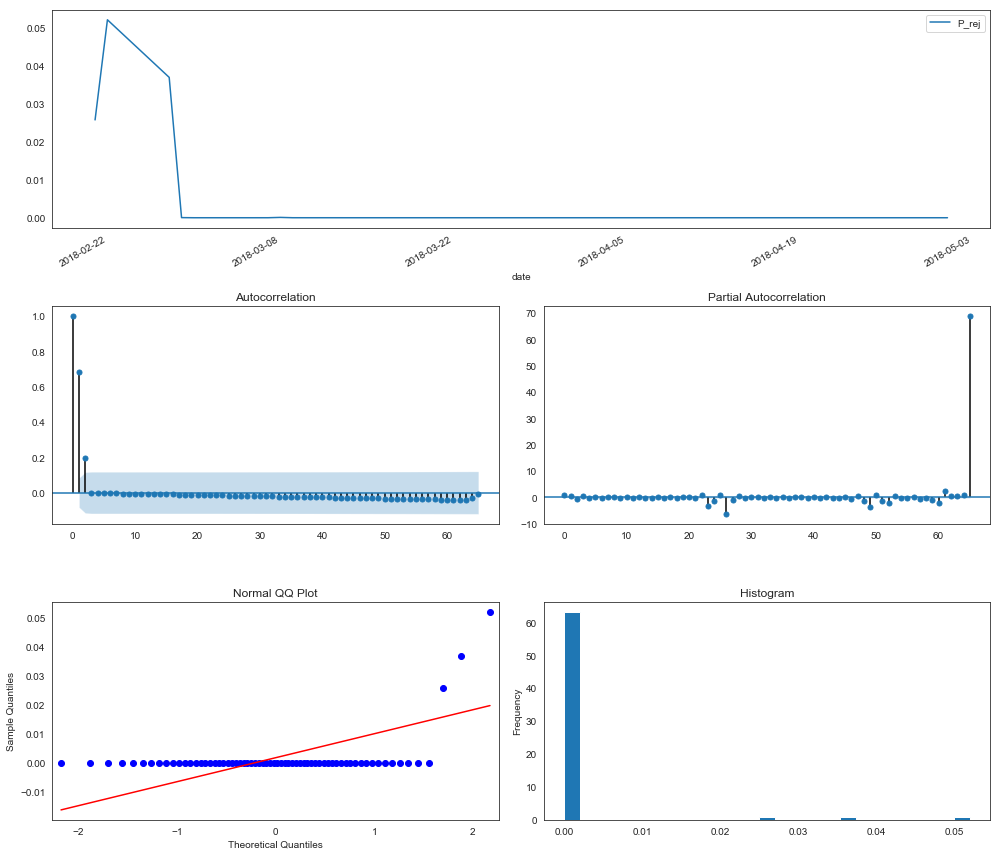

## Décomposition de la série de temps selon modèle multiplicatif



Multiplicative seasonality is not appropriate for zero and negative values


## Test de Dickey-Fuller

,Results of Augmented Dickey-Fuller test:
test statistic,-2301.488790
p-value,0.000000
# of lags,11.000000
# of observations,54.000000
Critical Value (1%),-3.557709
Critical Value (5%),-2.916770
Critical Value (10%),-2.596222


In [7]:
analyserZP(P_rej)

Observations: la fonction d'autocorrélation est nulle pour des lags srictement supérieurs à 2, on peut donc approximer la série par un modèle MA(2) qui admet une solution stationnaire. Cela est confirmé par le test de Dickey-Fuller: la série des p-valeur est stationnaire.

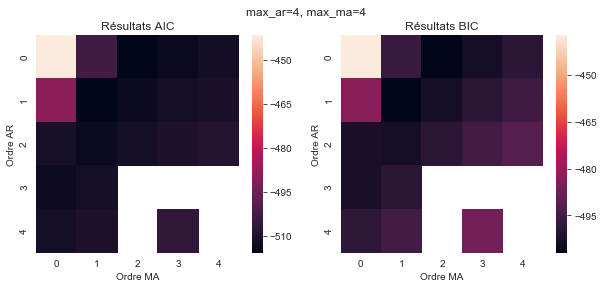

AIC meilleur modèle : AR=0, MA=2, AIC=-515.7791873377648 
BIC meilleur modèle : AR=0, MA=2, BIC=-507.02056836965914 


In [13]:

##################################### PARAMETRES #####################################
max_ar = 4
max_ma = 4
######################################################################################

order_select = sto.arma_order_select_ic(
    P_rej.values,
    ic = ['aic', 'bic'],
    max_ar=max_ar, 
    max_ma=max_ma
)

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.heatmap(order_select["aic"])
plt.xlabel("Ordre MA")
plt.ylabel("Ordre AR")
plt.title("Résultats AIC")

plt.subplot(1, 2, 2)
sns.heatmap(order_select["bic"])
plt.xlabel("Ordre MA")
plt.ylabel("Ordre AR")
plt.title("Résultats BIC")

plt.suptitle(f"max_ar={max_ar}, max_ma={max_ma}")
plt.show();

aic_min_order = order_select["aic_min_order"]
bic_min_order = order_select["bic_min_order"]
print(
    "AIC meilleur modèle : AR={}, MA={}, AIC={} ".format(
        aic_min_order[0], aic_min_order[1], 
        order_select['aic'].loc[aic_min_order]
    )
)
print(
    "BIC meilleur modèle : AR={}, MA={}, BIC={} ".format(
        bic_min_order[0], bic_min_order[1], 
        order_select['bic'].loc[bic_min_order]
    )
)

In [14]:
display(Markdown("# Meilleur modèle selon AIC"))
#testARMA(P_rej.values, p=aic_min_order[0], d=0, q=aic_min_order[1])  #not invertible

display(Markdown("# Meilleur modèle selon BIC"))
#testARMA(P_rej.values, p=bic_min_order[0], d=0, q=bic_min_order[1]) not invertible

# Meilleur modèle selon AIC

# Meilleur modèle selon BIC

## Fit du modèle



                              ARMA Model Results                              
Dep. Variable:                  P_rej   No. Observations:                   66
Model:                     ARMA(0, 1)   Log Likelihood                 254.572
Method:                       css-mle   S.D. of innovations              0.005
Date:                Mon, 28 Jan 2019   AIC                           -503.144
Time:                        19:27:52   BIC                           -496.575
Sample:                             0   HQIC                          -500.549
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0019      0.001      1.532      0.130      -0.001       0.004
ma.L1.P_rej     0.9869      0.113      8.711      0.000       0.765       1.209
                                    Roots     

## Erreurs

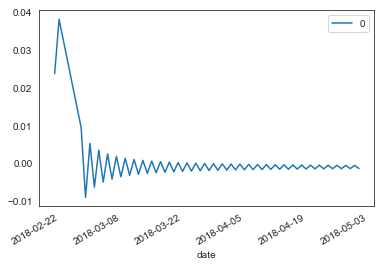

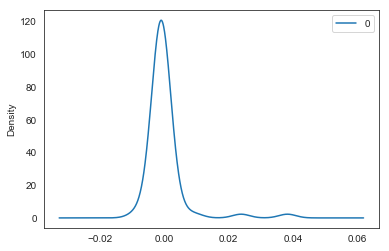

               0
count  66.000000
mean    0.000109
std     0.006135
min    -0.008970
25%    -0.001750
50%    -0.000508
75%     0.000006
max     0.038199


In [15]:
testARMA(P_rej,0,0,1)

Le test ARMA nous indique qu'un modèle MA(1) serait plus adapté aux données car le MA(2) calculé n'est pas inversible. Les p-valeurs des coefficients sont inférieures au seuil 0,2 et quasiment à celui de 0,1. Les erreurs du modèle suivent une gaussienne centrée en 0.

Attention,  4  journées avec NaN
                              ARMA Model Results                              
Dep. Variable:                  P_rej   No. Observations:                   70
Model:                     ARMA(0, 1)   Log Likelihood                 237.535
Method:                       css-mle   S.D. of innovations              0.008
Date:                Mon, 28 Jan 2019   AIC                           -469.070
Time:                        19:27:53   BIC                           -462.325
Sample:                    02-21-2018   HQIC                          -466.391
                         - 05-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0046      0.002      2.510      0.014       0.001       0.008
ma.L1.P_rej     0.9493      0.050     19.022      0.000       0.851       1.047
               

## Erreurs

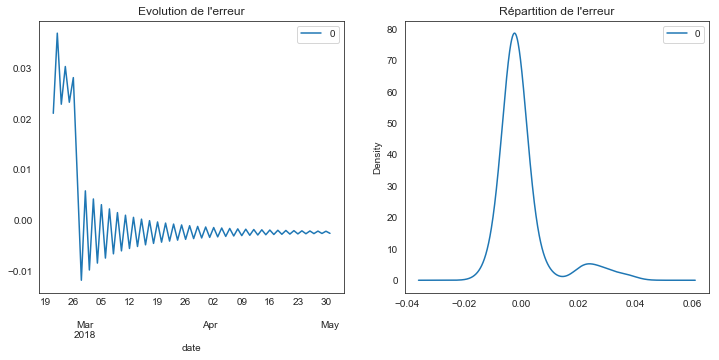

In [16]:
##################################### PARAMETRES #####################################
p = bic_min_order[0]  # AR(p)
d = 0  # d=0 pour ARMA
q = bic_min_order[1]  # MA(q)
p, q = 0, 1
######################################################################################

# asfreq permettra de faire des predictions et de les afficher facilement...
# ffill au cas ou il manque des jours... 
# mais faire très attention aux datasets où il manque une grosse plage de journées!
# genre a1c1 vers la fin... donc je mets une limite au nb max de jours manquants
print("Attention, ", P_rej.asfreq("D").isna().sum(), " journées avec NaN")

model_p = ARIMA(P_rej.asfreq("D").fillna(method="ffill"), order=(p, d, q), freq="D").fit()
# model_fit = model.fit(disp=0)
print(model_p.summary())
# print(model_fit.summary())
display(Markdown("## Erreurs"))
print('\n')
residuals = DataFrame(model_p.resid)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
residuals.plot(ax=plt.gca())
plt.title("Evolution de l'erreur")

plt.subplot(1, 2, 2)
residuals.plot(kind='kde', ax=plt.gca())
plt.title("Répartition de l'erreur")

plt.show()

### 6. Regarder à un temps t < tmax

L'idée est ici de tronquer la série chronologique de Z ou P à un instant t avant la fin de la campagne et de lui faire correspondre un modèle dans le but de savoir s'il est possible d'arrêter le test avant. (question budgétaire)

In [5]:
Z_cum, P_rej, p_cum = testZ_cum_frequency(data, freq='1D')

In [3]:
t = round(0.5*len(Z_cum))
Z_tronq = Z_cum[0:t]
P_tronq = P_rej[0:t]

Z_tronq


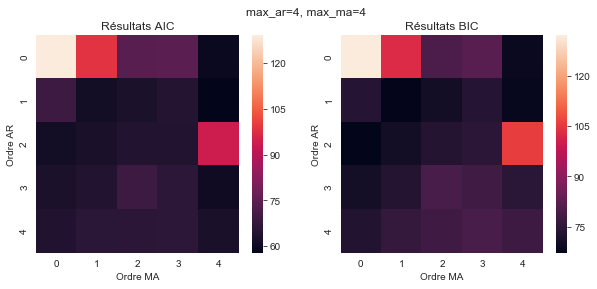

AIC meilleur modèle : AR=1, MA=4, AIC=57.800627493626365 
BIC meilleur modèle : AR=2, MA=0, BIC=67.13791370921557 


In [31]:
print("Z_tronq")

##################################### PARAMETRES #####################################
max_ar = 4
max_ma = 4
######################################################################################

order_select = sto.arma_order_select_ic(
    Z_tronq.values,
    ic = ['aic', 'bic'],
    max_ar=max_ar, 
    max_ma=max_ma
)

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.heatmap(order_select["aic"])
plt.xlabel("Ordre MA")
plt.ylabel("Ordre AR")
plt.title("Résultats AIC")

plt.subplot(1, 2, 2)
sns.heatmap(order_select["bic"])
plt.xlabel("Ordre MA")
plt.ylabel("Ordre AR")
plt.title("Résultats BIC")

plt.suptitle(f"max_ar={max_ar}, max_ma={max_ma}")
plt.show();

aic_min_order = order_select["aic_min_order"]
bic_min_order = order_select["bic_min_order"]
print(
    "AIC meilleur modèle : AR={}, MA={}, AIC={} ".format(
        aic_min_order[0], aic_min_order[1], 
        order_select['aic'].loc[aic_min_order]
    )
)
print(
    "BIC meilleur modèle : AR={}, MA={}, BIC={} ".format(
        bic_min_order[0], bic_min_order[1], 
        order_select['bic'].loc[bic_min_order]
    )
)

Meilleur modèle AIC non inversible

## BIC Best Model



Attention,  4  journées avec NaN
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   37
Model:                     ARMA(2, 0)   Log Likelihood                 -28.084
Method:                       css-mle   S.D. of innovations              0.496
Date:                Thu, 14 Feb 2019   AIC                             64.167
Time:                        14:12:05   BIC                             70.611
Sample:                    02-21-2018   HQIC                            66.439
                         - 03-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2768      1.112     -4.745      0.000      -7.456      -3.097
ar.L1.y        1.4431      0.139     10.414      0.000       1.171       1.715
ar.L2.y       -0.

## Erreurs

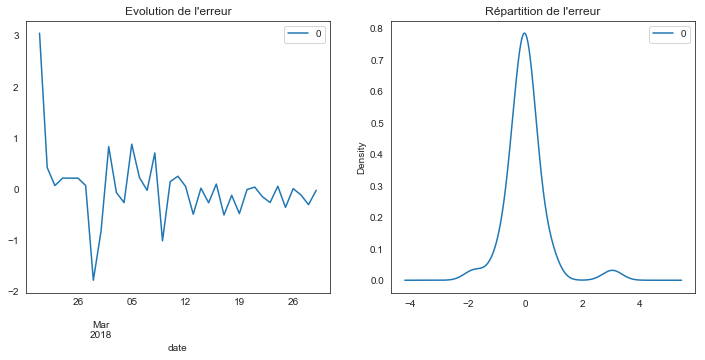

MSE :
17.849149878116275
AIC :
64.167
BIC :
70.611


In [33]:
##################################### PARAMETRES #####################################
d = 0
display(Markdown("## BIC Best Model"))
print('\n')
p, q = bic_min_order[0], bic_min_order[1]
######################################################################################

# asfreq permettra de faire des predictions et de les afficher facilement...
# ffill au cas ou il manque des jours... 
# mais faire très attention aux datasets où il manque une grosse plage de journées!
# genre a1c1 vers la fin... donc je mets une limite au nb max de jours manquants
print("Attention, ", Z_tronq.asfreq("D").isna().sum(), " journées avec NaN")

model_z_t = ARIMA(Z_tronq.asfreq("D").fillna(method="ffill"), order=(p, d, q), freq="D").fit()
# model_fit = model.fit(disp=0)
print(model_z_t.summary())
# print(model_fit.summary())
display(Markdown("## Erreurs"))
print('\n')
residuals = DataFrame(model_z_t.resid)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
residuals.plot(ax=plt.gca())
plt.title("Evolution de l'erreur")

plt.subplot(1, 2, 2)
residuals.plot(kind='kde', ax=plt.gca())
plt.title("Répartition de l'erreur")

plt.show()

print('MSE :')
print(sum(np.array(residuals)**2)[0])
print('AIC :')
print(round(model_z_t.aic,3))
print('BIC :')
print(round(model_z_t.bic,3))

P_tronq


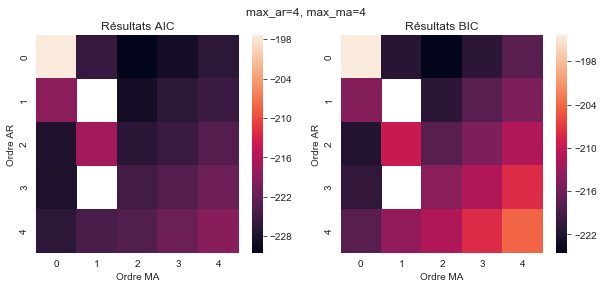

AIC meilleur modèle : AR=0, MA=2, AIC=-230.54205452749903 
BIC meilleur modèle : AR=0, MA=2, BIC=-224.5560242816331 


In [11]:
print("P_tronq")

##################################### PARAMETRES #####################################
max_ar = 4
max_ma = 4
######################################################################################

order_select = sto.arma_order_select_ic(
    P_tronq.values,
    ic = ['aic', 'bic'],
    max_ar=max_ar, 
    max_ma=max_ma
)

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.heatmap(order_select["aic"])
plt.xlabel("Ordre MA")
plt.ylabel("Ordre AR")
plt.title("Résultats AIC")

plt.subplot(1, 2, 2)
sns.heatmap(order_select["bic"])
plt.xlabel("Ordre MA")
plt.ylabel("Ordre AR")
plt.title("Résultats BIC")

plt.suptitle(f"max_ar={max_ar}, max_ma={max_ma}")
plt.show();

aic_min_order = order_select["aic_min_order"]
bic_min_order = order_select["bic_min_order"]
print(
    "AIC meilleur modèle : AR={}, MA={}, AIC={} ".format(
        aic_min_order[0], aic_min_order[1], 
        order_select['aic'].loc[aic_min_order]
    )
)
print(
    "BIC meilleur modèle : AR={}, MA={}, BIC={} ".format(
        bic_min_order[0], bic_min_order[1], 
        order_select['bic'].loc[bic_min_order]
    )
)

Meilleurs modèles non inversibles

Attention,  4  journées avec NaN
                              ARMA Model Results                              
Dep. Variable:                  P_rej   No. Observations:                   37
Model:                     ARMA(0, 1)   Log Likelihood                 114.814
Method:                       css-mle   S.D. of innovations              0.011
Date:                Thu, 14 Feb 2019   AIC                           -223.628
Time:                        14:13:29   BIC                           -218.795
Sample:                    02-21-2018   HQIC                          -221.924
                         - 03-29-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0087      0.003      2.615      0.013       0.002       0.015
ma.L1.P_rej     0.9399      0.089     10.600      0.000       0.766       1.114
               

## Erreurs

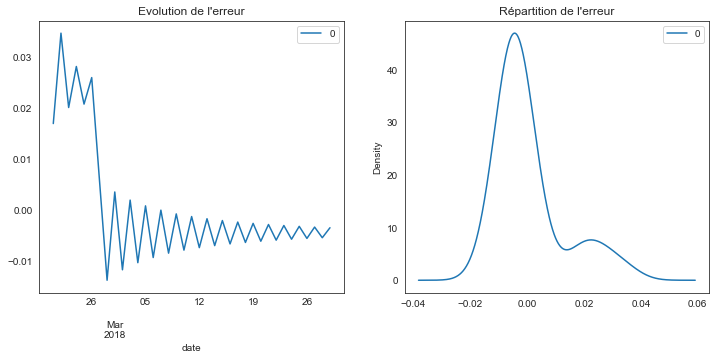

MSE :
0.004968784750214158
AIC :
-223.628
BIC :
-218.795


In [35]:
##################################### PARAMETRES #####################################
d = 0
p, q = 0, 1
######################################################################################

# asfreq permettra de faire des predictions et de les afficher facilement...
# ffill au cas ou il manque des jours... 
# mais faire très attention aux datasets où il manque une grosse plage de journées!
# genre a1c1 vers la fin... donc je mets une limite au nb max de jours manquants
print("Attention, ", P_tronq.asfreq("D").isna().sum(), " journées avec NaN")

model_p_t = ARIMA(P_tronq.asfreq("D").fillna(method="ffill"), order=(p, d, q), freq="D").fit()
print(model_p_t.summary())
display(Markdown("## Erreurs"))
print('\n')
residuals = DataFrame(model_p_t.resid)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
residuals.plot(ax=plt.gca())
plt.title("Evolution de l'erreur")

plt.subplot(1, 2, 2)
residuals.plot(kind='kde', ax=plt.gca())
plt.title("Répartition de l'erreur")

plt.show()

print('MSE :')
print(sum(np.array(residuals)**2)[0])
print('AIC :')
print(round(model_p_t.aic,3))
print('BIC :')
print(round(model_p_t.bic,3))

###  Prédiction

Quelles sont les prévisions selon le modèle sur les données existantes (in-sample)? 
On réalise des prédictions de `pred_start` à `pred_end` (None donne la fin de la période)
On peut distinguer deux types de prévisions : 
+ 1-step-ahead : on utilise toutes les données jusqu'à J-1
+ Dynamic : à partir de pred_start on utilise les variables prédites comme entrées

#### c. Z_cum

out_of_sample_prediction of Z_cum with 95% Confidence Interval, train_ratio= 0.25


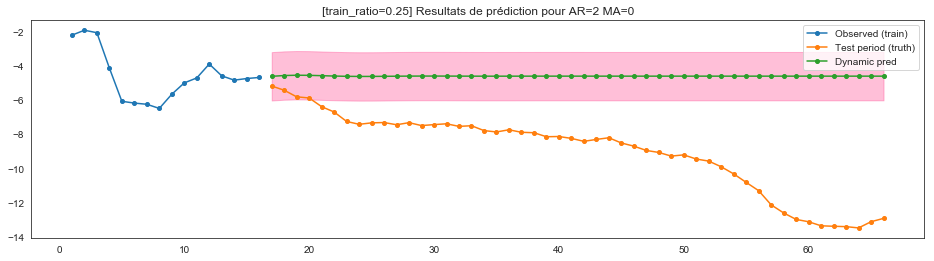

out_of_sample_prediction of Z_cum with 95% Confidence Interval, train_ratio= 0.5


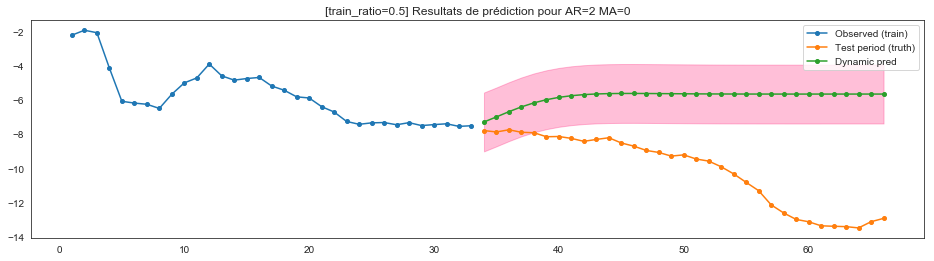

out_of_sample_prediction of Z_cum with 95% Confidence Interval, train_ratio= 0.75


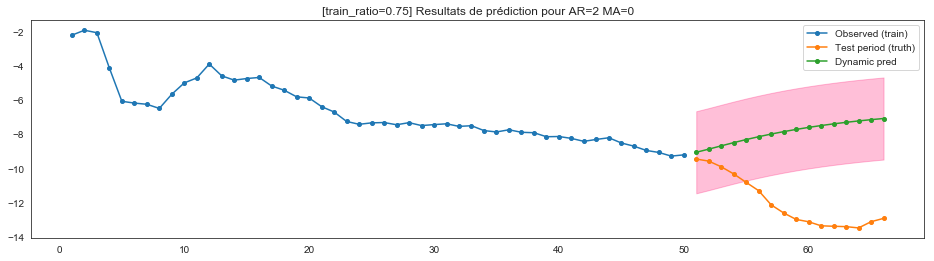

In [6]:
##################################### PARAMETRES #####################################
pred_start = 45  # debut des predictions
pred_end = 100  # fin des predictions
pred_start = 15
pred_end = None
p = 2
q = 0

train_ratio_list = [0.25,0.5,0.75]
for train_ratio in train_ratio_list:
    print("out_of_sample_prediction of Z_cum with 95% Confidence Interval, train_ratio=", train_ratio)
    out_of_sample_prediction(p=p, q=q, y_true=Z_cum, train_ratio=train_ratio, signif = False)



Prédiction de P_rej avec un modèle sur Z_cum with 95% Confidence Interval, train_ratio= 0.25
Dépassement de la vraie série du seuil ( = significatif) à 0.2
50
Dépassement de la prédiction dynamique du seuil ( = significatif) à 0.2
50
Dépassement de la vraie série du seuil ( = significatif) à 0.1
50
Dépassement de la prédiction dynamique du seuil ( = significatif) à 0.1
50


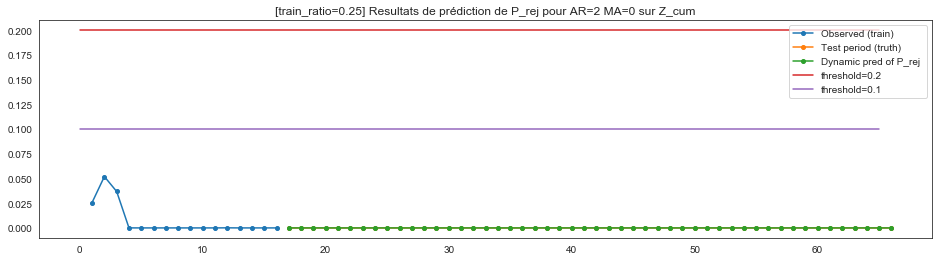

Prédiction de P_rej avec un modèle sur Z_cum with 95% Confidence Interval, train_ratio= 0.5
Dépassement de la vraie série du seuil ( = significatif) à 0.2
33
Dépassement de la prédiction dynamique du seuil ( = significatif) à 0.2
33
Dépassement de la vraie série du seuil ( = significatif) à 0.1
33
Dépassement de la prédiction dynamique du seuil ( = significatif) à 0.1
33


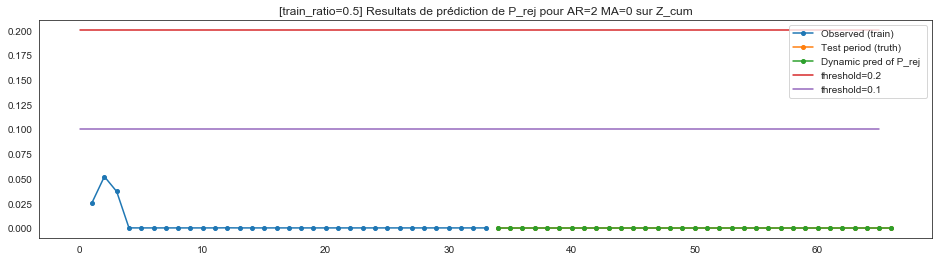

Prédiction de P_rej avec un modèle sur Z_cum with 95% Confidence Interval, train_ratio= 0.65
Dépassement de la vraie série du seuil ( = significatif) à 0.2
23
Dépassement de la prédiction dynamique du seuil ( = significatif) à 0.2
23
Dépassement de la vraie série du seuil ( = significatif) à 0.1
23
Dépassement de la prédiction dynamique du seuil ( = significatif) à 0.1
23


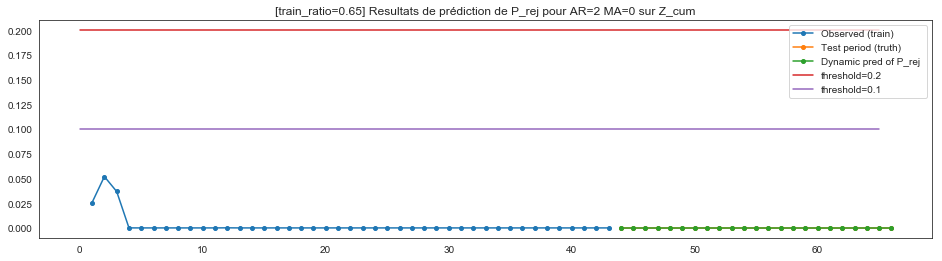

In [7]:
##################################### PARAMETRES #####################################
pred_start = 45  # debut des predictions
pred_end = 100  # fin des predictions
pred_start = 15
pred_end = None
p = 2
q = 0
######################################################################################
train_ratio_list = [0.25,0.5,0.65]
for train_ratio in train_ratio_list:
    print("Prédiction de P_rej avec un modèle sur Z_cum with 95% Confidence Interval, train_ratio=", train_ratio)
    p_with_fit_of_z(p=p, q=q, p_true = P_rej,z_true=Z_cum, train_ratio=train_ratio,signif= True)

CI si petit qu'on ne le voit pas à l'échelle du graphe

#### b. P_rej

out_of_sample_prediction of P_rej with 95% Confidence Interval, train_ratio= 0.25
Dépassement de la vraie série du seuil ( = significatif) à 0.2
50
Dépassement de la prédiction dynamique du seuil ( = significatif) à 0.2
50
Dépassement de la vraie série du seuil ( = significatif) à 0.1
50
Dépassement de la prédiction dynamique du seuil ( = significatif) à 0.1
50


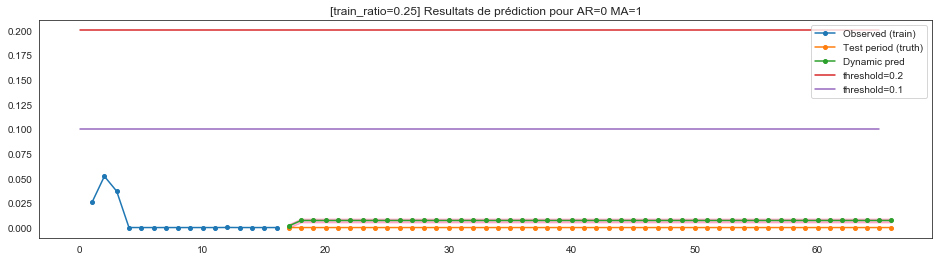

out_of_sample_prediction of P_rej with 95% Confidence Interval, train_ratio= 0.5
Dépassement de la vraie série du seuil ( = significatif) à 0.2
33
Dépassement de la prédiction dynamique du seuil ( = significatif) à 0.2
33
Dépassement de la vraie série du seuil ( = significatif) à 0.1
33
Dépassement de la prédiction dynamique du seuil ( = significatif) à 0.1
33


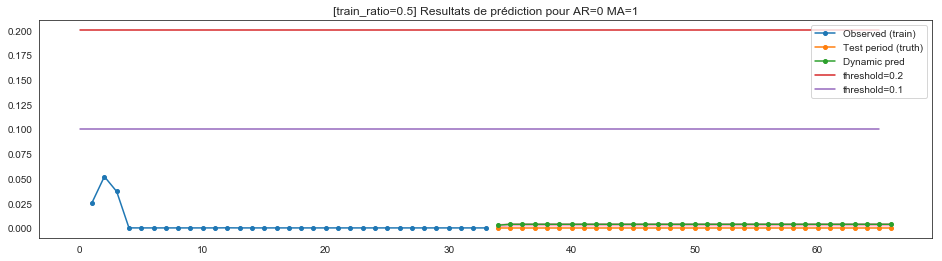

out_of_sample_prediction of P_rej with 95% Confidence Interval, train_ratio= 0.7
Dépassement de la vraie série du seuil ( = significatif) à 0.2
20
Dépassement de la prédiction dynamique du seuil ( = significatif) à 0.2
20
Dépassement de la vraie série du seuil ( = significatif) à 0.1
20
Dépassement de la prédiction dynamique du seuil ( = significatif) à 0.1
20


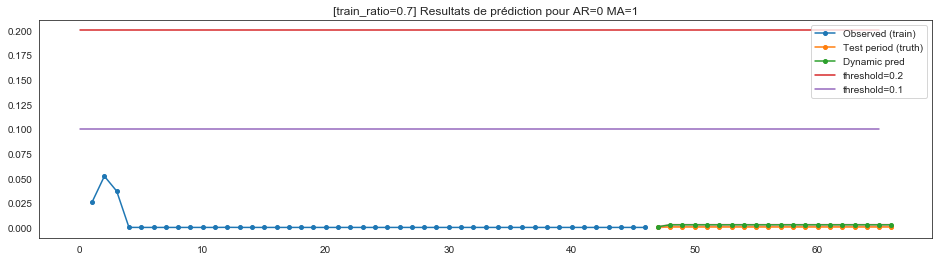

In [8]:
##################################### PARAMETRES #####################################
pred_start = 45  # debut des predictions
pred_end = 100  # fin des predictions
pred_start = 15
pred_end = None
p = 0
q = 1
######################################################################################


train_ratio_list = [0.25,0.5,0.7]
for train_ratio in train_ratio_list:
    print("out_of_sample_prediction of P_rej with 95% Confidence Interval, train_ratio=", train_ratio)
    out_of_sample_prediction(p=p, q=q, y_true=P_rej, train_ratio=train_ratio,signif = True)

Ici, les prédictions dynamiques et à un pas donnent de bons résultats sur la p-valeur. Ce qui n'est pas le cas sur la Z_valeur, où seulement les prévisions à un pas sont satisfaisantes.

La prévision du modèle provenant des séries tronquées est moins bonne, il y a très peu de différences entre dynamique et non dynamique. Le prévision semble respecter la tendance de la courbe pour la p_valeur, ce n'est pas le cas pour Z. La significativité de la prédiction est la même que celle de la courbe réelle, à savoir significatif.